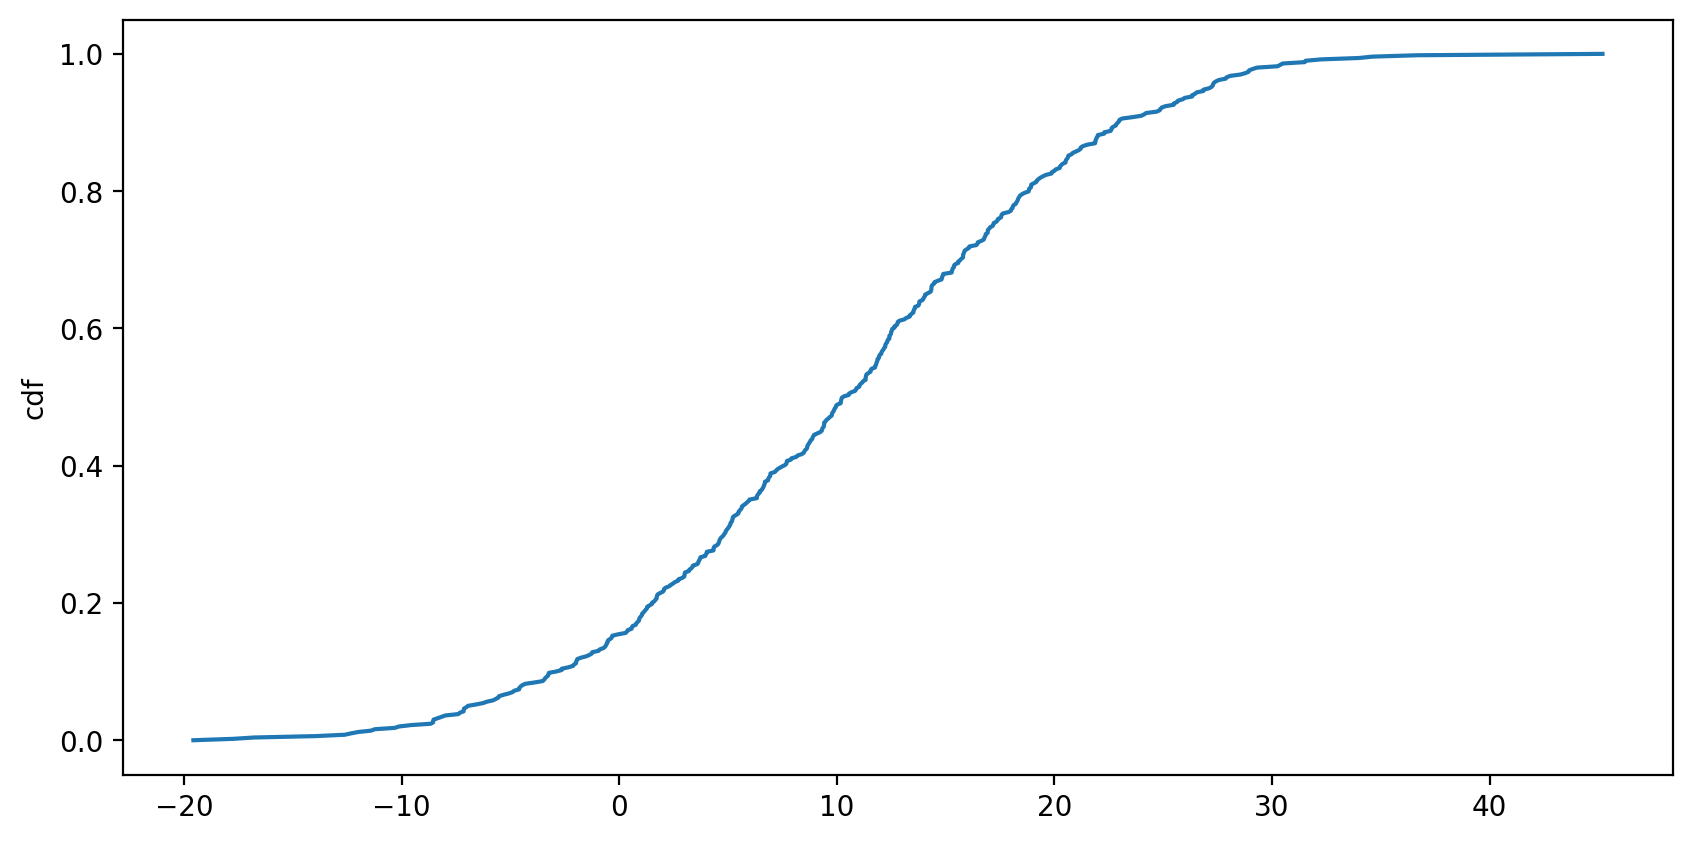

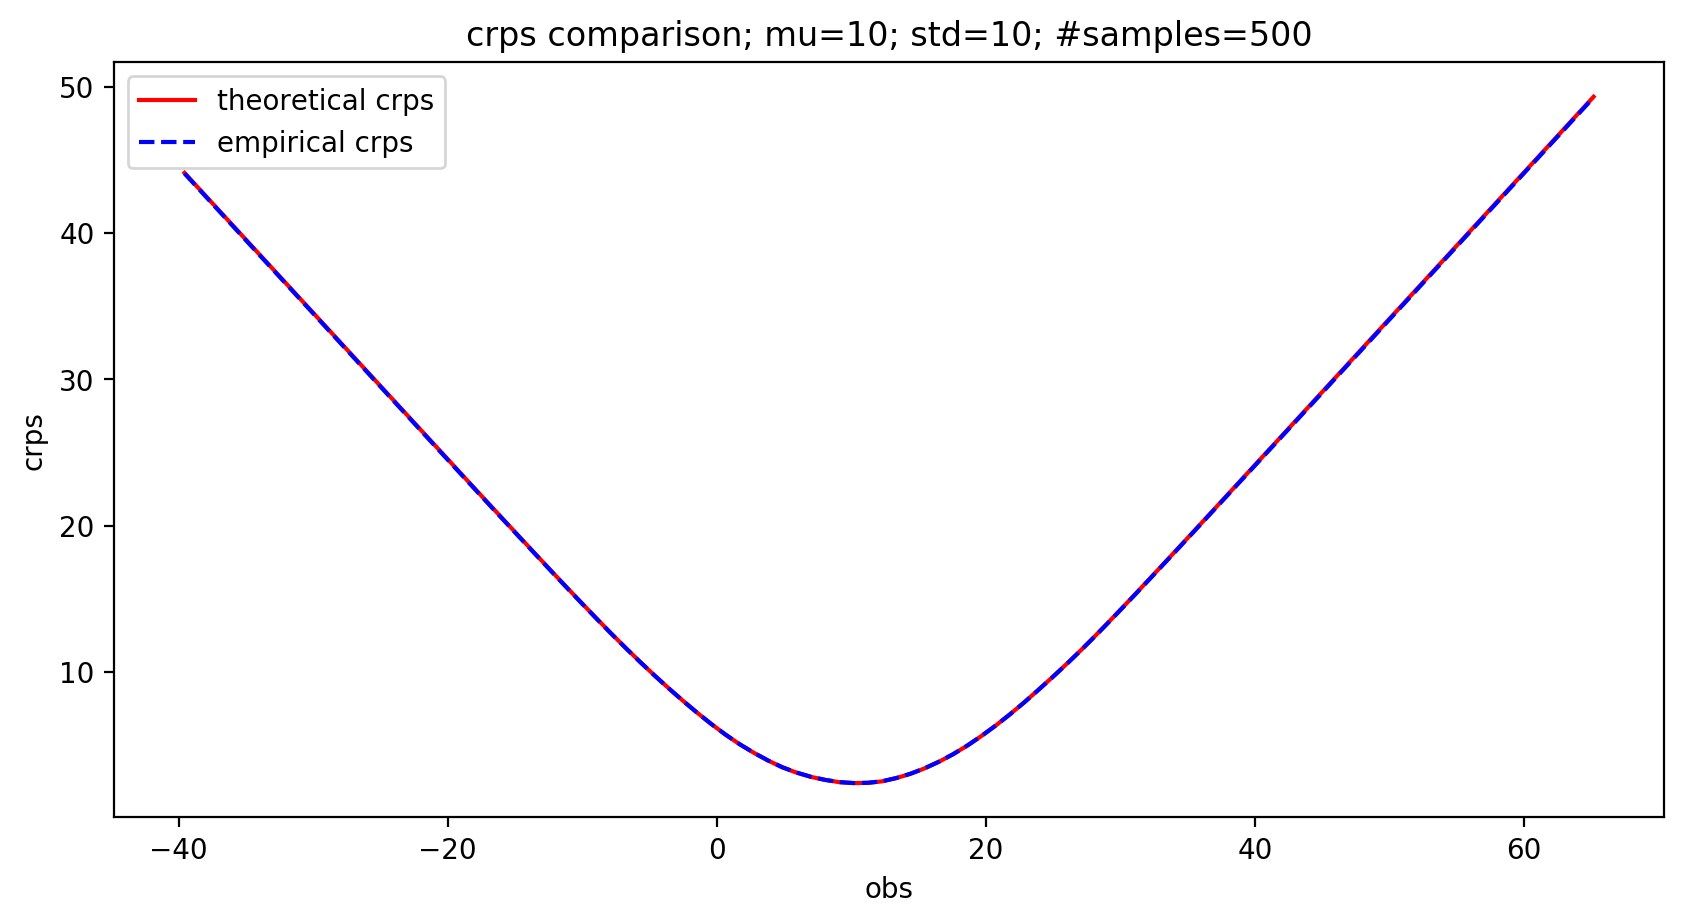

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def get_cdf(samples,
    obs=None,
    n=1e5,
    ):
    cdf_x = np.sort(samples)
    cdf_y = 1.*np.arange(len(samples))/(len(samples)-1)
    min_sample = min(samples)
    max_sample = max(samples)
    if obs is None:
        return cdf_x, cdf_y
    else:
        new_cdf_x = np.linspace(min(obs, min_sample), max(obs, max_sample), int(n))
        new_cdf_y = np.interp(new_cdf_x, cdf_x, cdf_y)
        return new_cdf_x, new_cdf_y

def get_theoretical_crps(samples, obs):
    cdf_x, cdf_y = get_cdf(samples, obs=obs)
    idxs = np.where(cdf_x>obs)[0]
    rect_cdf_y = np.zeros_like(cdf_y)
    rect_cdf_y[idxs] = 1.
    diff = (cdf_y-rect_cdf_y)**2
    crps = np.trapz(diff, x=cdf_x, axis=0)
    return crps
    
def get_empirical_crps(samples, obs):
    n = len(samples)
    crps1 = 1/n*sum([abs(samples[i]-obs) for i in range(0, n)])
    crps2 = 0
    for i in range(0, n):
        for j in range(0, n):
            crps2 += abs(samples[i]-samples[j])/(2*n**2)
    crps = crps1-crps2
    return crps

n = 500
mu = 10
std = 10
samples = np.random.normal(mu, std, size=n)
#samples = np.random.gamma(shape=2, scale=5, size=n)
fig, ax = plt.subplots(1, 1, figsize=(10,5), dpi=200)
cdf_x, cdf_y = get_cdf(samples)
ax.plot(cdf_x, cdf_y)
ax.set_ylabel('cdf')
plt.show()

dx = 20
theoretical_crps = []
empirical_crps = []
fig, ax = plt.subplots(1, 1, figsize=(10,5), dpi=200)
obs_x = np.linspace(min(samples)-dx, max(samples)+dx, 100)
for _obs_x in obs_x:
    theoretical_crps += [get_theoretical_crps(samples, _obs_x)]
    empirical_crps += [get_empirical_crps(samples, _obs_x)]
ax.plot(obs_x, theoretical_crps, '-', c='r', label='theoretical crps')
ax.plot(obs_x, empirical_crps, '--', c='b', label='empirical crps')
ax.set_title(f'crps comparison; mu={mu}; std={std}; #samples={n}')
ax.set_xlabel('obs')
ax.set_ylabel('crps')
ax.legend()
plt.show()